# Lehnert Control

Experiment: `/network/tmp1/chenant/ant/sr_trace/2021-02-13/11-04-20`
- Goal location is shifted by 1 every 400 episodes
- Start location does not change

Today: February 13, 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import files

Read the dfs, filter out the LSF value function agent from the `1228` runs and use the new LSF value function agent from the `1230` runs (which has the elig traces) for comparison.

In [2]:
sfAg_in_path = '/Users/anthony/Playground/tensorboard_logs/sr_return/2021-02-13/11-04-20/progress.csv'

pd_df_sep = '\|\|'

In [3]:
# LSF value function agent
sf_ag_raw_df = pd.read_csv(sfAg_in_path, sep=pd_df_sep)

/Users/anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
withDate_Data_df = sf_ag_raw_df.copy(deep=True)
print(len(withDate_Data_df))
withDate_Data_df[0:3]

240000


,"2021-02-13 11:04:20,855",num_episodes,envCls_name,env_kwargs,agentCls_name,seed,gamma,lr,sf_lr,reward_lr,...,total_steps,cumulative_reward,v_fn_rmse,sf_G_rmse,sf_matrix_rmse,reward_vec_rmse,value_loss_avg,reward_loss_avg,sf_loss_avg,et_loss_avg
0,"2021-02-13 11:04:20,919",4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",QAgent,2,0.9,0.01,None,None,...,201,0.0,None,None,None,None,5.890170e-12,None,None,None
1,"2021-02-13 11:04:20,954",4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",QAgent,2,0.9,0.01,None,None,...,201,0.0,None,None,None,None,5.446743e-12,None,None,None
2,"2021-02-13 11:04:20,983",4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",QAgent,2,0.9,0.01,None,None,...,201,0.0,None,None,None,None,6.083269e-12,None,None,None


#### Manually drop the date time column

In [5]:
Data_df = withDate_Data_df.copy(deep=True)
del Data_df['2021-02-13 11:04:20,855']
print(list(Data_df))
print(len(Data_df))
Data_df[0:3]

['num_episodes', 'envCls_name', 'env_kwargs', 'agentCls_name', 'seed', 'gamma', 'lr', 'sf_lr', 'reward_lr', 'lamb', 'eta_trace', 'policy_epsilon', 'use_true_reward_params', 'use_true_sf_params', 'episode_idx', 'total_steps', 'cumulative_reward', 'v_fn_rmse', 'sf_G_rmse', 'sf_matrix_rmse', 'reward_vec_rmse', 'value_loss_avg', 'reward_loss_avg', 'sf_loss_avg', 'et_loss_avg']
240000


,num_episodes,envCls_name,env_kwargs,agentCls_name,seed,gamma,lr,sf_lr,reward_lr,lamb,...,total_steps,cumulative_reward,v_fn_rmse,sf_G_rmse,sf_matrix_rmse,reward_vec_rmse,value_loss_avg,reward_loss_avg,sf_loss_avg,et_loss_avg
0,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",QAgent,2,0.9,0.01,None,None,0.0,...,201,0.0,None,None,None,None,5.890170e-12,None,None,None
1,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",QAgent,2,0.9,0.01,None,None,0.0,...,201,0.0,None,None,None,None,5.446743e-12,None,None,None
2,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",QAgent,2,0.9,0.01,None,None,0.0,...,201,0.0,None,None,None,None,6.083269e-12,None,None,None


## Fixed lr, performance

In [8]:
print(set(Data_df['agentCls_name']))
print(set(Data_df['lr']))

{'QAgent'}
{0.1, 0.01, 0.2, 0.3}


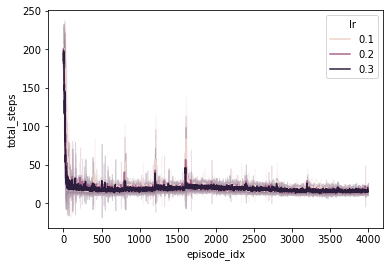

In [10]:
def script_plot_performance(in_df):
    plt_x = 'episode_idx'
    plt_y = 'total_steps'
    plt_ci = 'sd'
    plt_n_boot = 10
    
    # # 
    filters = {
        'lr': [0.1, 0.2,0.3]
    }
    
    # ==
    # Copy and filter
    df = in_df.copy(deep=True)
    for k in filters:
        df = df[df[k].isin(filters[k])]
    
    # ==
    # Plot
    sns.lineplot(x=plt_x, y=plt_y, 
                 hue='lr',
                 ci=plt_ci, n_boot=plt_n_boot, 
                 data=df)
    
    

script_plot_performance(Data_df)